In [567]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

In [568]:
import pandas as pd
df = pd.read_csv("SalaryPredictionofDataProfessions.csv")

df.head(500)

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,JEFF,ABER,M,11-03-2012,01-07-2016,Senior Analyst,27.0,63154,Finance,16.0,14.0,5.0,3
496,NINA,AMBURGEY,F,11-27-2013,01-07-2016,Analyst,25.0,45992,Finance,30.0,0.0,4.0,2
497,CLEMENT,AIONA,M,3-25-2014,01-07-2016,Analyst,22.0,44887,IT,27.0,3.0,2.0,0
498,DONN,ALDREGE,M,10-02-2012,01-07-2016,Senior Analyst,26.0,57046,Web,27.0,3.0,2.0,0


In [569]:
df.head(5)

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [570]:
df.shape

(2639, 13)

In [571]:
df.dtypes

FIRST NAME           object
LAST NAME            object
SEX                  object
DOJ                  object
CURRENT DATE         object
DESIGNATION          object
AGE                 float64
SALARY                int64
UNIT                 object
LEAVES USED         float64
LEAVES REMAINING    float64
RATINGS             float64
PAST EXP              int64
dtype: object

In [572]:
df.isnull().sum()

FIRST NAME          0
LAST NAME           2
SEX                 0
DOJ                 1
CURRENT DATE        0
DESIGNATION         0
AGE                 3
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
dtype: int64

<Axes: >

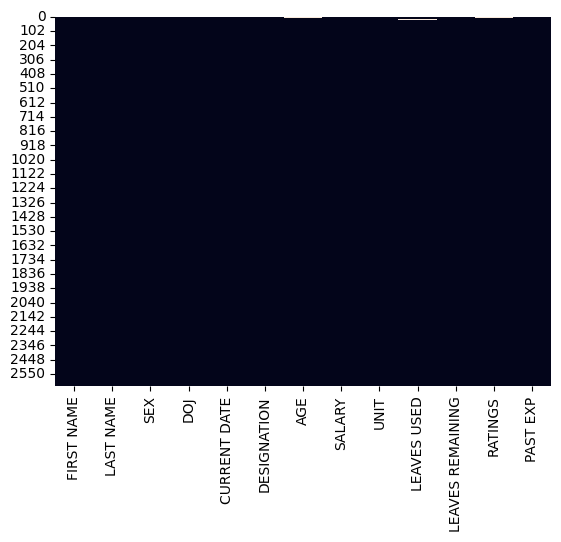

In [573]:
sns.heatmap(df.isnull(),cbar=False)

In [574]:
df.dropna(inplace=True)
df.head(5)

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
6,ELLIOT,AGULAR,M,09-02-2013,01-07-2016,Analyst,22.0,40339,Marketing,19.0,11.0,5.0,0
8,KATHY,ALSOP,F,6-29-2014,01-07-2016,Senior Analyst,28.0,63478,Operations,20.0,10.0,3.0,1


In [575]:
df.isnull().sum().sum()

np.int64(0)

In [576]:
df = df.dropna().reset_index(drop=True)

## **VERİ GÖRSELLEŞTİRME**

In [577]:
#Colors of Graphs
color = ['#E7CCCC', '#A5B68D']

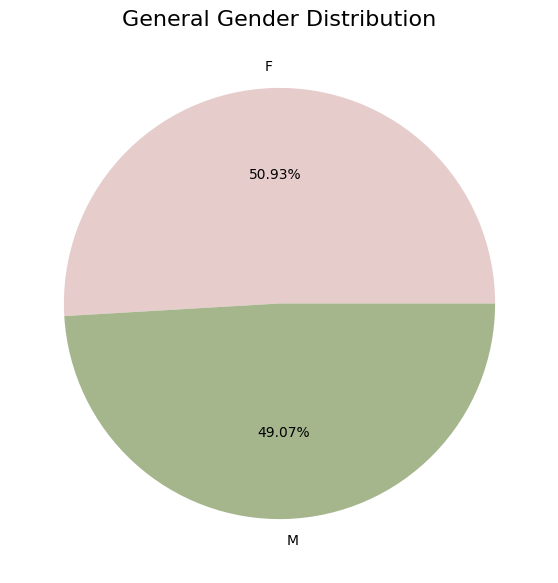

In [578]:
#General Gender Distribution
General_gender_distribution = df['SEX'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(General_gender_distribution,  labels=General_gender_distribution.index, autopct="%1.2f%%", colors=color)
plt.title('General Gender Distribution', fontsize=16)
plt.show()

In [579]:
#Average Salary By Gender
average_salary_by_gender = df.groupby('SEX')['SALARY'].mean().reset_index()
print(average_salary_by_gender)


  SEX        SALARY
0   F  59150.119403
1   M  57045.981410


/var/folders/n7/wrs6z3md1zv2ks07dcdwl0gc0000gn/T/ipykernel_45089/1733701368.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SEX', y='SALARY', data=average_salary_by_gender, palette=color)


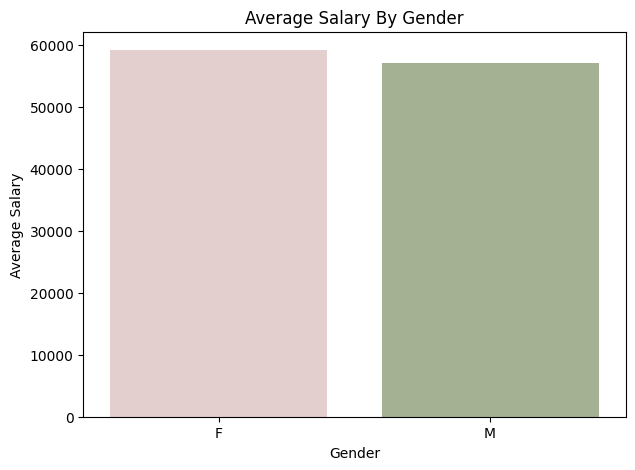

In [580]:
#Average Salary By Gender Graph
plt.figure(figsize=(7, 5))
sns.barplot(x='SEX', y='SALARY', data=average_salary_by_gender, palette=color)
plt.title('Average Salary By Gender')
plt.xlabel('Gender')
plt.ylabel('Average Salary')
plt.show()

In [581]:
#Average Salaries by Unit and Gender
average_salaries_unit_and_Gender = df.groupby(['UNIT', 'SEX'])['SALARY'].mean().unstack()
print(average_salaries_unit_and_Gender)

SEX                    F             M
UNIT                                  
Finance     60163.443038  56326.201923
IT          59140.936937  58924.487395
Management  59950.169725  58383.154589
Marketing   61274.413953  57549.823529
Operations  56658.300000  54337.995392
Web         57741.991228  56556.575000


<Figure size 1000x600 with 0 Axes>

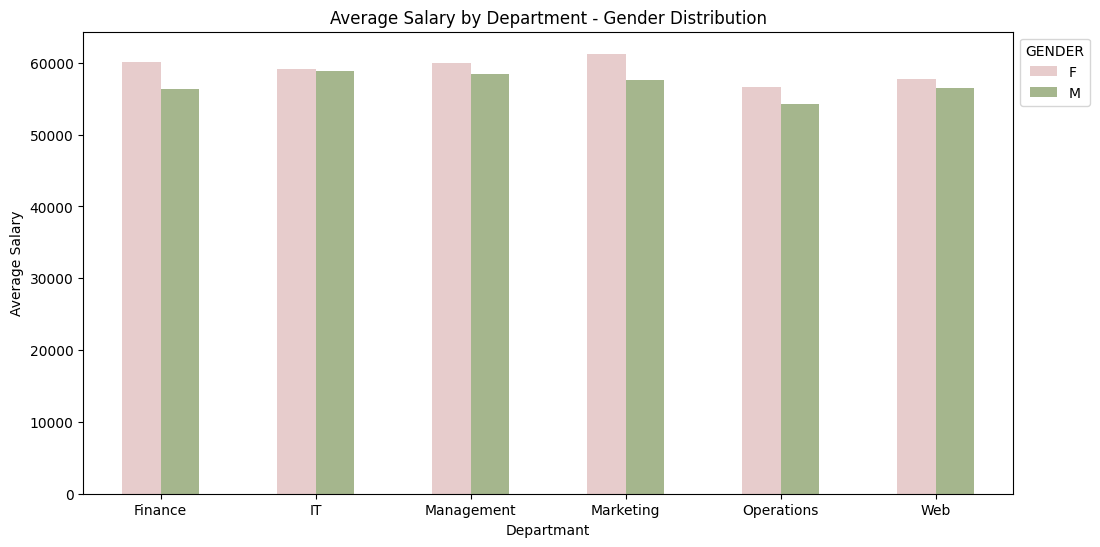

In [582]:
#Average Salaries by Unit and Gender Graph
plt.figure(figsize=(10, 6))
average_salaries_unit_and_Gender.plot(kind='bar', figsize=(12, 6), color=color)
plt.title('Average Salary by Department - Gender Distribution')
plt.xlabel('Departmant')
plt.ylabel('Average Salary')
plt.xticks(rotation=360)
plt.legend(title='GENDER', bbox_to_anchor=(1,1))
plt.show()

In [583]:
#Average Salaries by Designation and Gender

average_salaries_designation_and_gender = df.groupby(['DESIGNATION', 'SEX'])['SALARY'].mean().unstack()
print(average_salaries_designation_and_gender)

SEX                         F              M
DESIGNATION                                 
Analyst          45049.050352   44994.883158
Associate        88281.723684   86178.731707
Director        289822.285714  281528.181818
Manager         126430.512821  126125.952381
Senior Analyst   59542.676136   60252.044444
Senior Manager  180613.514286  176734.576923


<Figure size 1000x600 with 0 Axes>

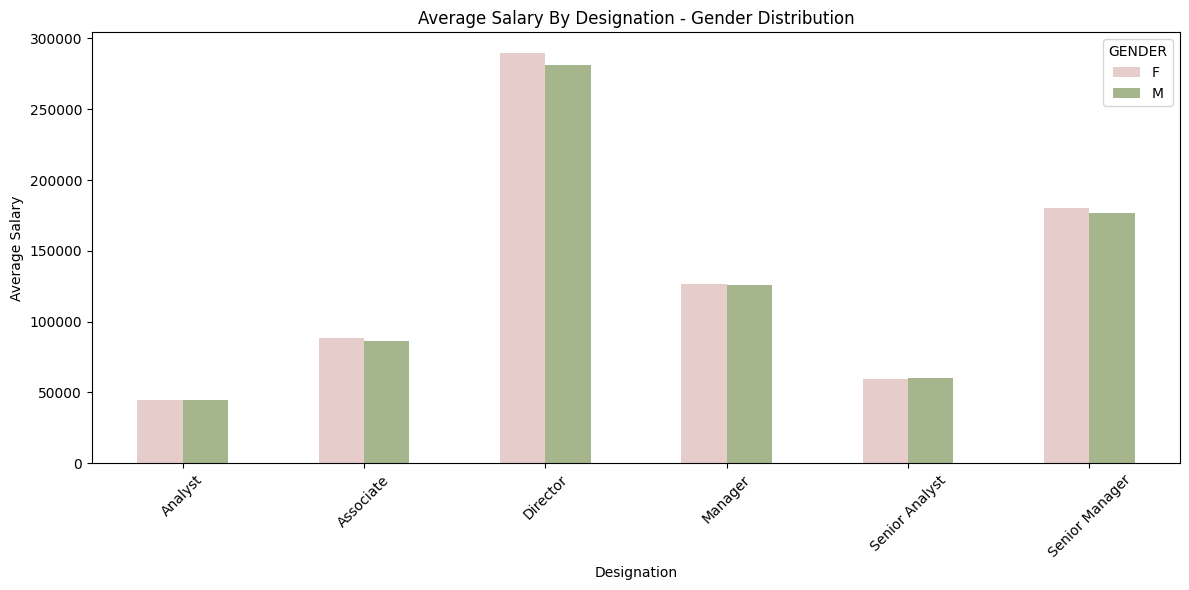

In [584]:
#Average Salaries by Designation and Gender Graph
plt.figure(figsize=(10, 6))
average_salaries_designation_and_gender.plot(kind='bar', figsize=(12, 6), color=color)
plt.title('Average Salary By Designation - Gender Distribution')
plt.xlabel('Designation')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.legend(title='GENDER', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

In [585]:
#Calculating the number of years of work in the company and adding a new column
df['DOJ'] = pd.to_datetime(df['DOJ'], format='%m-%d-%Y')
df['CURRENT_DATE'] = pd.to_datetime('01-07-2016', format='%m-%d-%Y')
df['YEAR OF SENIORITY'] = (df['CURRENT_DATE'] - df['DOJ']).dt.days / 365

In [586]:
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,CURRENT_DATE,YEAR OF SENIORITY
0,TOMASA,ARMEN,F,2014-05-18,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0,2016-01-07,1.641096
1,OLIVE,ANCY,F,2014-07-28,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0,2016-01-07,1.446575
2,CHERRY,AQUILAR,F,2013-04-03,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0,2016-01-07,2.764384
3,ELLIOT,AGULAR,M,2013-09-02,01-07-2016,Analyst,22.0,40339,Marketing,19.0,11.0,5.0,0,2016-01-07,2.347945
4,KATHY,ALSOP,F,2014-06-29,01-07-2016,Senior Analyst,28.0,63478,Operations,20.0,10.0,3.0,1,2016-01-07,1.526027


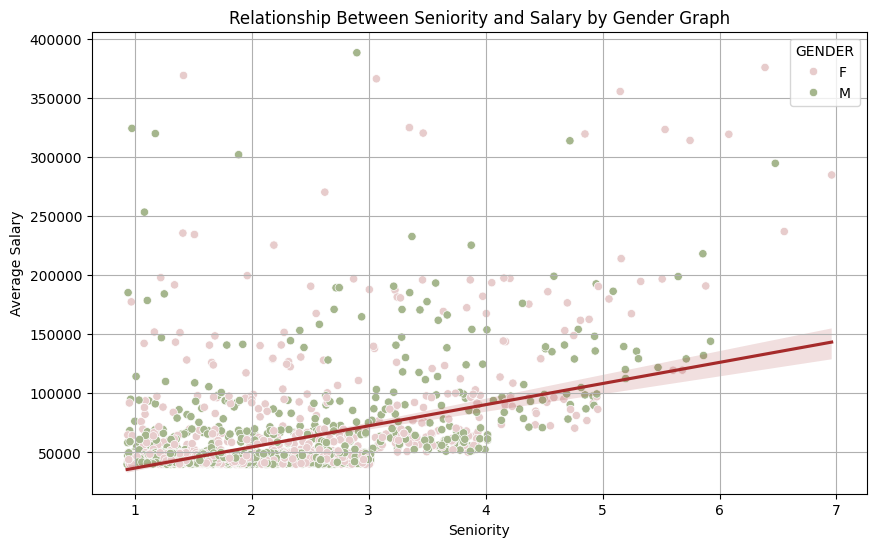

In [587]:
#Relationship Between Seniority and Average Salary by Gender Graph
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YEAR OF SENIORITY', y='SALARY', hue='SEX', data=df, palette=color)
sns.regplot(x='YEAR OF SENIORITY', y='SALARY', data=df, scatter=False, color='brown', line_kws={'label':"Trendline"})
plt.title('Relationship Between Seniority and Salary by Gender Graph')
plt.xlabel('Seniority')
plt.ylabel('Average Salary')
plt.legend(title='GENDER', bbox_to_anchor=(1,1))
plt.grid(True)
plt.show()

Bu grafikten anlaşıldığı üzere çalışma yılı ile alınan maaş arasında bir ilişki yoktur.

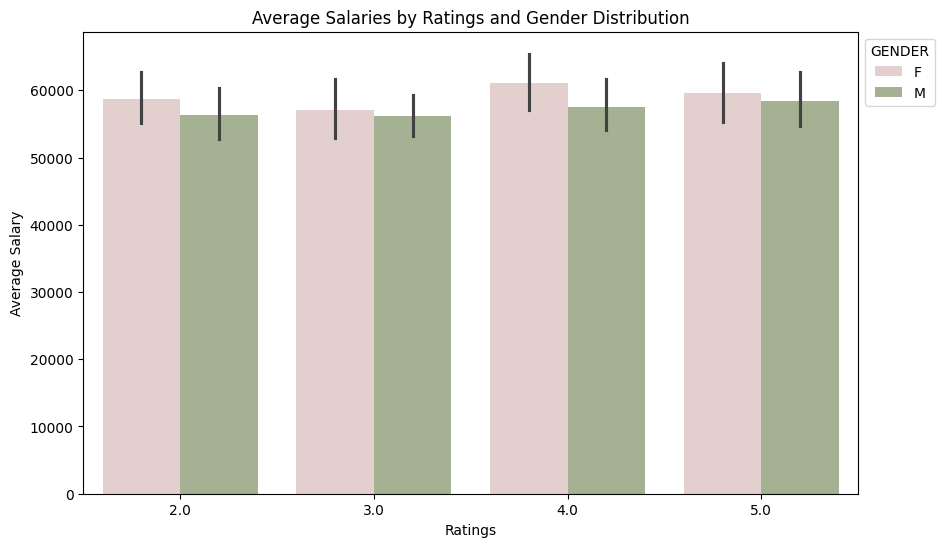

In [588]:
#Average Salaries by Ratings and Gender Graph
average_salaries_ratings_and_gender = df.groupby('RATINGS')['SALARY'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='RATINGS', y='SALARY', hue='SEX', data=df, palette=color)
plt.title('Average Salaries by Ratings and Gender Distribution')
plt.xlabel('Ratings')
plt.ylabel('Average Salary')
plt.legend(title='GENDER',bbox_to_anchor=(1,1))
plt.show()

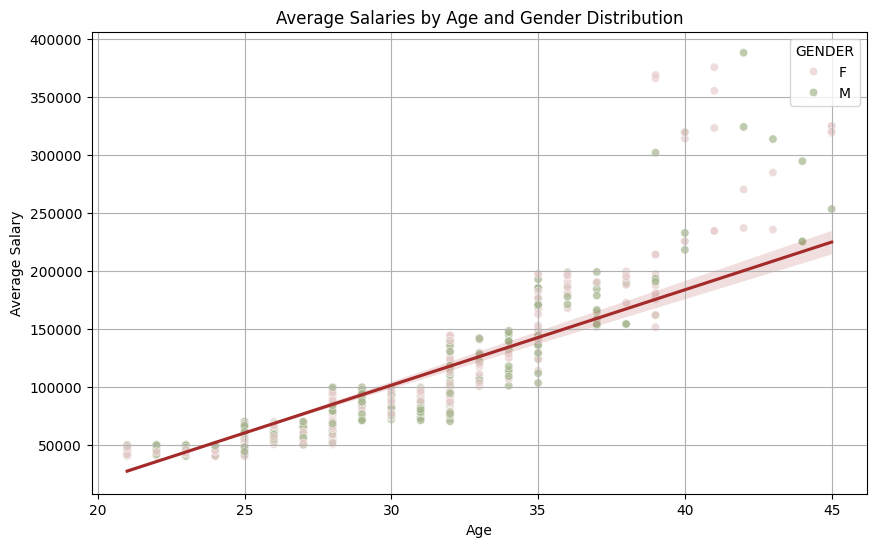

In [589]:
#Average Salaries by Age and Gender Graph
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AGE', y='SALARY', hue='SEX', data=df, palette=color, alpha=0.7)
sns.regplot(x='AGE', y='SALARY', data=df, scatter=False, color='brown', line_kws={'label':"Trendline"})
plt.title('Average Salaries by Age and Gender Distribution')
plt.xlabel('Age')
plt.ylabel('Average Salary')
plt.legend(title='GENDER', bbox_to_anchor=(1,1))
plt.grid(True)
plt.show()

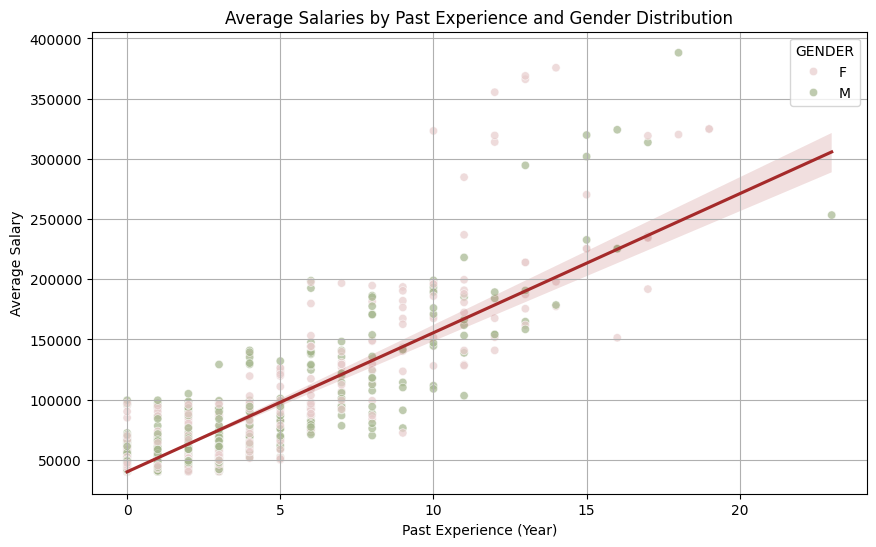

In [590]:
#Average Salaries by Past Experience and Gender Graph
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PAST EXP', y='SALARY', hue='SEX', data=df, palette=color, alpha=0.7)
sns.regplot(x='PAST EXP', y='SALARY', data=df, scatter=False, color='brown', line_kws={'label':"Trendline"})
plt.title('Average Salaries by Past Experience and Gender Distribution')
plt.xlabel('Past Experience (Year)')
plt.ylabel('Average Salary')
plt.legend(title='GENDER', bbox_to_anchor=(1,1))
plt.grid(True)
plt.show()

## **Machine Learning**

Convert **SEX** column from object to integer


In [591]:
print(df['SEX'].unique())

['F' 'M']


In [592]:
print(df['SEX'].dtype)

object


In [593]:
df['SEX_M'] = df['SEX'].apply(lambda x: 1 if x == 'M' else 0)
print(df[['SEX', 'SEX_M']].head())

  SEX  SEX_M
0   F      0
1   F      0
2   F      0
3   M      1
4   F      0


In [594]:
df = pd.get_dummies(df, columns=['UNIT'], drop_first=True)


**X ve Y Tanımlama**

In [595]:
X = df[['AGE', 'PAST EXP', 'SEX_M'] + [col for col in df.columns if 'UNIT_' in col]]
y = df['SALARY']



In [596]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [597]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Model Selection**

Listelediğimiz regresyon modellerinden en uygun olanını bulmak için bir fonksiyon yazdık.

In [598]:
#List of Regression Models
regression_models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR(),
]

In [599]:
for model in regression_models:
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    mean_rmse = np.mean(rmse_scores)
    print(f"{model.__class__.__name__}: Mean RMSE = {mean_rmse:.2f}")

LinearRegression: Mean RMSE = 17409.66
Ridge: Mean RMSE = 17409.19
Lasso: Mean RMSE = 17409.46
ElasticNet: Mean RMSE = 17334.75
RandomForestRegressor: Mean RMSE = 13455.10
GradientBoostingRegressor: Mean RMSE = 13743.50
SVR: Mean RMSE = 38755.52


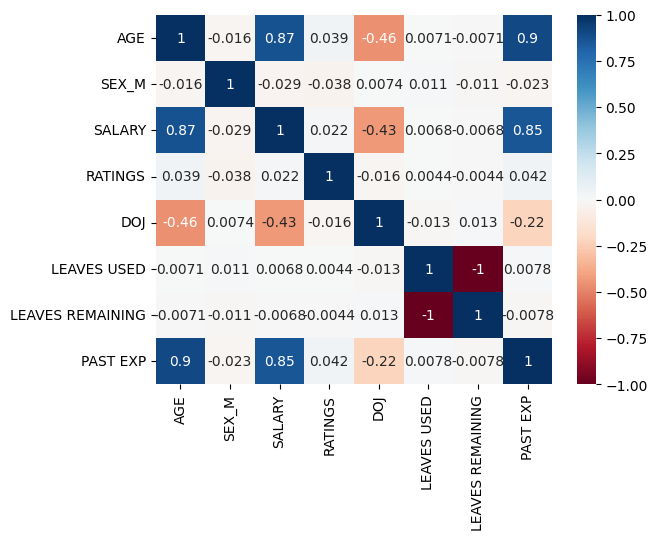

In [600]:
selected_data = df[['AGE','SEX_M', 'SALARY','RATINGS','DOJ','LEAVES USED','LEAVES REMAINING','PAST EXP']]
corr = selected_data.corr()

# Korelasyon grafiği çizme
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, annot=True)
plt.show()

In [601]:
best_performing = min(regression_models, key=lambda model: np.mean(np.sqrt(-cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))))
print(f"Best Model: {best_performing.__class__.__name__}")

Best Model: RandomForestRegressor


RMSE değerlerini kıyaslayan bu fonksiyonumuz sayesinde en düşük rmse değeri olan Random Forest Regressor'ü seçmiş olduk.

In [602]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R^2:", r2_score(y_test, y_pred))


MAE: 5450.384643974293
MSE: 105900301.61707465
R^2: 0.9153766946292438


Sonrasında daha önce tanımlamış olduğumuz X ve Y değerleri ile random forest regresyonunu kullanarak tahminlemeler yaptırarak görselleştirdik.

MAE: 5870.277881952485
MSE: 159766672.65250063
R^2: 0.8923648183353864


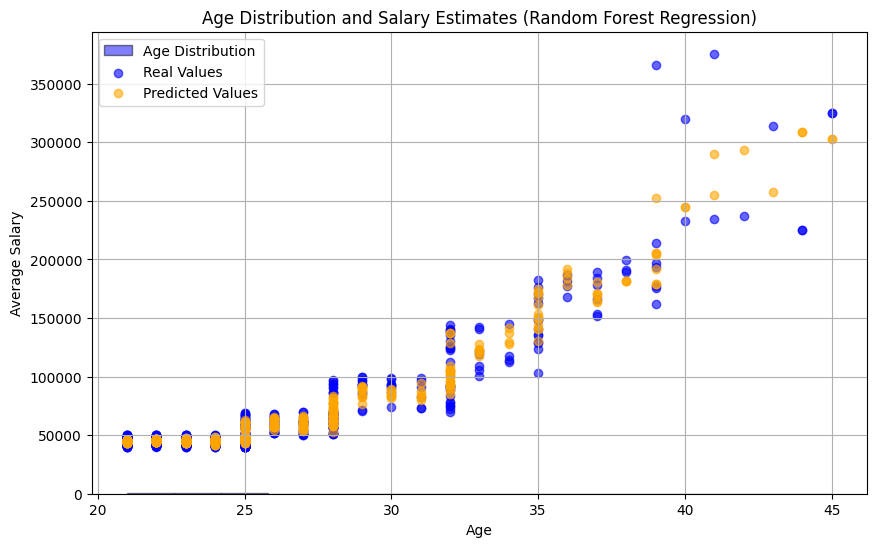

In [603]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=1/3, random_state=0)

class RandomForestModel:
    def __init__(self):
        self.model = RandomForestRegressor(n_estimators=100, random_state=42)

    def fit(self, X, y):
        self.model.fit(X, y)

    def predict(self, X):
        return self.model.predict(X)

model = RandomForestModel()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R^2:", r2_score(y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.hist(df['AGE'], bins=15, color='blue', alpha=0.5, edgecolor='black', label='Age Distribution')

plt.scatter(df['AGE'].iloc[y_test.index], y_test, color='blue', label='Real Values', alpha=0.6)
plt.scatter(df['AGE'].iloc[y_test.index], y_pred, color='orange', label='Predicted Values', alpha=0.6)

plt.title('Age Distribution and Salary Estimates (Random Forest Regression)')
plt.xlabel('Age')
plt.ylabel('Average Salary')
plt.legend()
plt.grid(True)
plt.show()


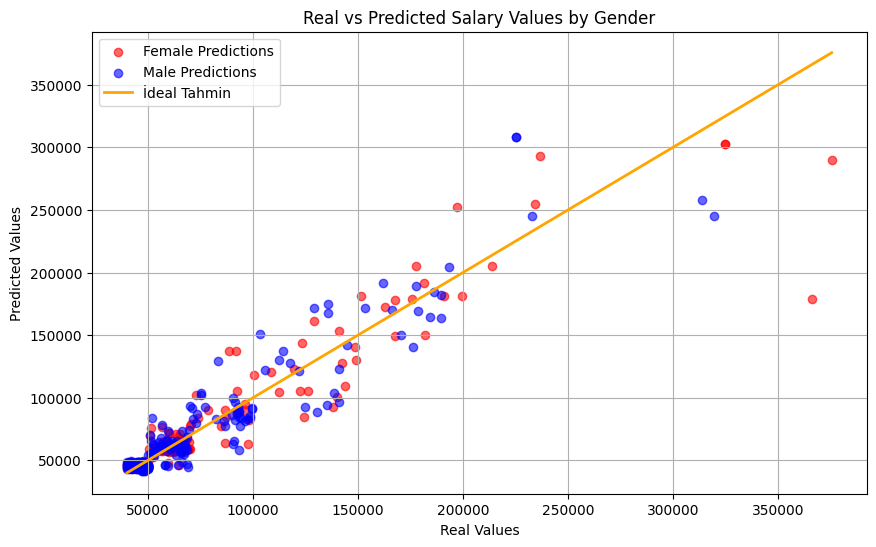

In [604]:
#Gerçek vs Tahmini Maaş Değerleri
plt.figure(figsize=(10, 6))

plt.scatter(y_test[df['SEX_M'].iloc[y_test.index] == 0], y_pred[df['SEX_M'].iloc[y_test.index] == 0], 
            color='red', label='Female Predictions', alpha=0.6)

plt.scatter(y_test[df['SEX_M'].iloc[y_test.index] == 1], y_pred[df['SEX_M'].iloc[y_test.index] == 1], 
            color='blue', label='Male Predictions', alpha=0.6)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='orange', lw=2, label='İdeal Tahmin')

plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Real vs Predicted Salary Values by Gender')
plt.legend()
plt.grid(True)
plt.show()


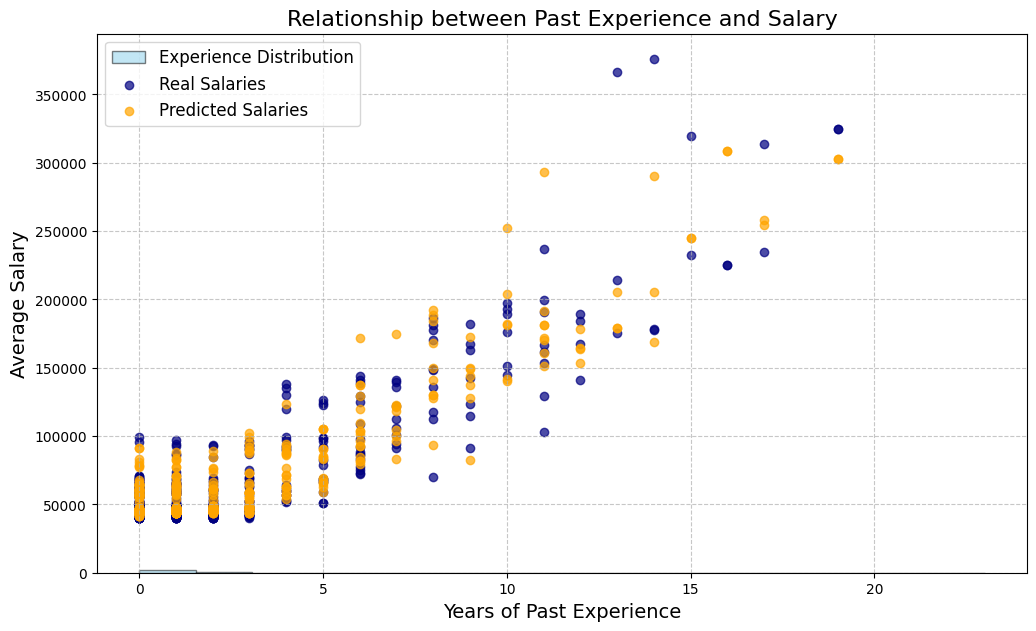

In [605]:
plt.figure(figsize=(12, 7)) 

plt.hist(
    df['PAST EXP'], bins=15, color='skyblue', alpha=0.5, 
    edgecolor='black', label='Experience Distribution'
)

plt.scatter(
    df['PAST EXP'].iloc[y_test.index], y_test, 
    color='navy', label='Real Salaries', alpha=0.7
)
plt.scatter(
    df['PAST EXP'].iloc[y_test.index], y_pred, 
    color='orange', label='Predicted Salaries', alpha=0.7
)

plt.title('Relationship between Past Experience and Salary', fontsize=16)
plt.xlabel('Years of Past Experience', fontsize=14)
plt.ylabel('Average Salary', fontsize=14)

plt.legend(loc='upper left', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [539]:
unit_columns = [col for col in df.columns if 'UNIT_' in col]
print(unit_columns)


['UNIT_IT', 'UNIT_Management', 'UNIT_Marketing', 'UNIT_Operations', 'UNIT_Web']


FIRST NAME                   object
LAST NAME                    object
SEX                          object
DOJ                  datetime64[ns]
CURRENT DATE                 object
DESIGNATION                  object
AGE                         float64
SALARY                        int64
LEAVES USED                 float64
LEAVES REMAINING            float64
RATINGS                     float64
PAST EXP                      int64
CURRENT_DATE         datetime64[ns]
YEAR OF SENIORITY           float64
SEX_M                         int64
UNIT_IT                        bool
UNIT_Management                bool
UNIT_Marketing                 bool
UNIT_Operations                bool
UNIT_Web                       bool
dtype: object

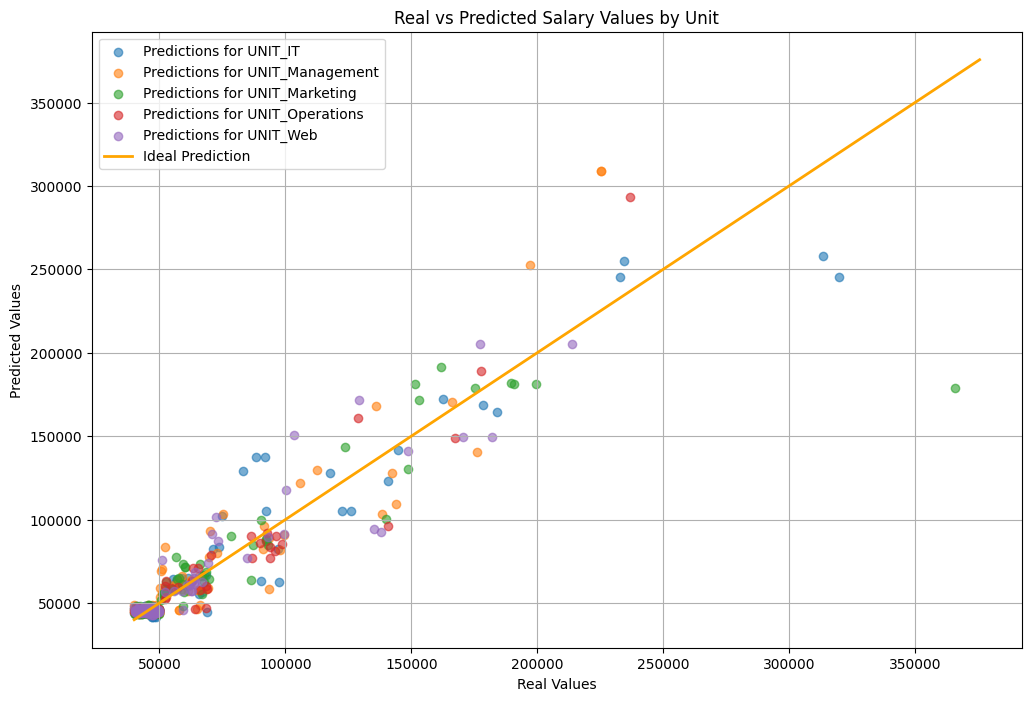

In [566]:
y_pred = pd.Series(y_pred, index=y_test.index)
plt.figure(figsize=(12, 8))

# Her bir UNIT sütunu için
for col in unit_columns:
    # 1.0 olanları filtrele
    mask = df[col] == 1.0
    
    # mask'in True olduğu indeksleri almak
    true_indices = df[mask].index  # df'den mask ile filtrelenmiş indeksleri al

    # y_test ve y_pred'yi bu indekslerle filtreleme
    filtered_y_test = y_test[y_test.index.isin(true_indices)]
    filtered_y_pred = y_pred[y_pred.index.isin(true_indices)]

    plt.scatter(filtered_y_test, filtered_y_pred, label=f'Predictions for {col}', alpha=0.6)

# İdeal tahmin çizgisi
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='orange', lw=2, label='Ideal Prediction')

plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Real vs Predicted Salary Values by Unit')
plt.legend()
plt.grid(True)
plt.show()

